# Guided Tour of Building and optimizing a Neural Network
**A presentation by the Data Science and Analytics Club at UVA for HooHacks 2024** 

Workshop by: Maajid Husain :: [LinkedIn](https://www.linkedin.com/in/maajid-husain/) :: [Github](https://github.com/maajidhusain)

## The Problem
We've recently acquired a large warehouse filled with an unsorted collection of fashion items. It's an exciting opportunity, but also a bit of a puzzle. Our goal is to create a smart, yet straightforward system to classify each clothing item efficiently. This system won't just identify each piece; it'll help us organize them into a database, effectively setting up our initial inventory before we even start our sales.

Our product manager has laid out a clear strategy for developing this model. The plan involves leveraging some of the latest machine learning technology to accurately categorize every item in our inventory. This approach is not just about bringing order to our collection; it's about doing so in a way that's mindful of our computational resources.

By taking this step, we're not just preparing for our launch. We're setting a foundation for efficiency and organization that will support our growth long-term. It's about making sure that every piece of clothing is not only accounted for but also ready to meet its new owner. Let's embark on this journey together, turning our vast inventory from a challenge into one of our biggest assets.

An overview of how to solve the problem:
1. Prepare Data
2. Decide on model architecture
3. Train and validate the model
5. Create ETL pipeline to store data

*If you want to go further, create a webapp that allows the user to seach through images using the tags and update the inventory when an item is sold*

In [26]:
## These are just dependencies for the project ##
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 

print (tf.__version__) 

2.11.1


### Step 1: Loading and processing the data
- The data is sourced straight from the keras library!

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define the class names for plotting
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


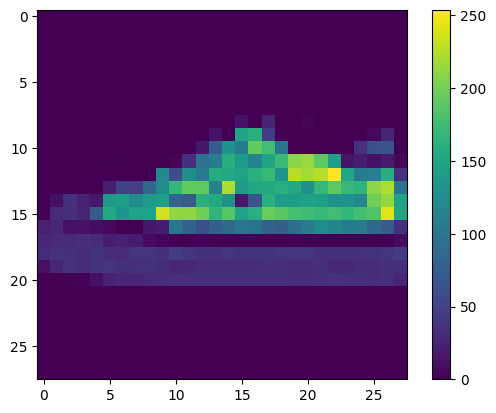

In [21]:
# visualize random image
random_num = np.random.randint(0, len(train_images)-1)
plt.figure()
plt.imshow(train_images[random_num])
plt.colorbar()
plt.grid(False)

Images need to be scaled for numerical stability (smaller range helps during model training), ensuring that each feature has a similar influence on the model, and for efficient model computation

In [24]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

**An overview of the dataset**

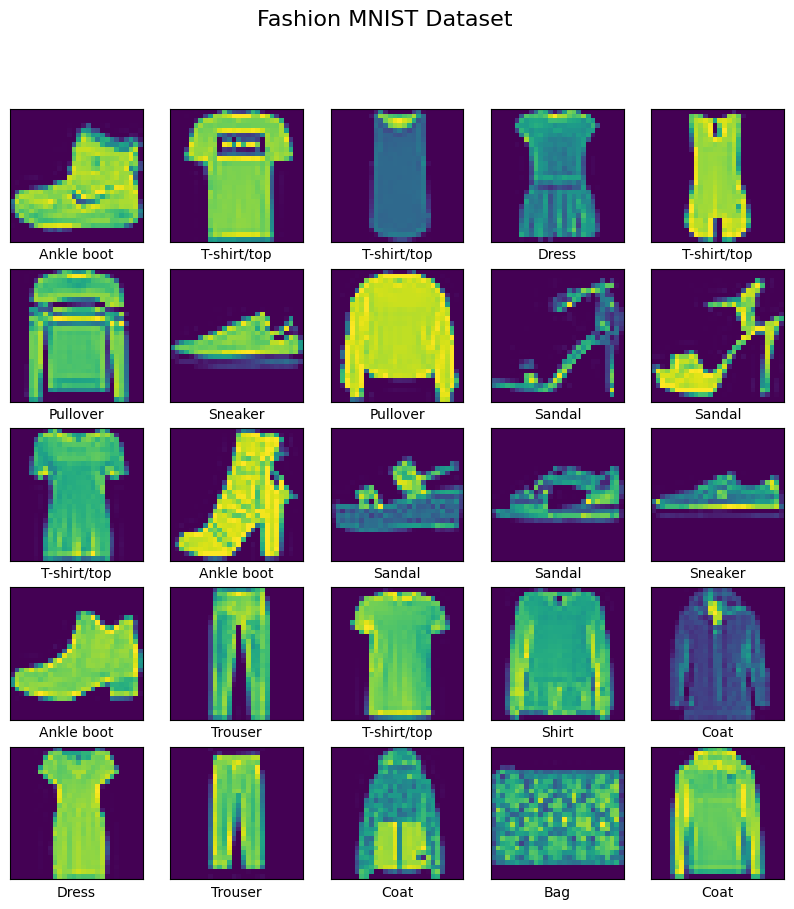

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.viridis)  # Change the color map to viridis
	plt.xlabel(class_names[train_labels[i]])
plt.suptitle("Fashion MNIST Dataset", fontsize=16)  # Add a title to the plot
plt.show()
	

### Step 2: Model Architecture
Flatten Layer:

- Converts 2D images (28x28 pixels) into a 1D array of 784 pixels.
- Prepares our data for dense layers by reshaping it.


Dense Layer with ReLU Activation:

- Contains 128 neurons, fully connected.
- Uses ReLU activation to introduce non-linearity, allowing the model to learn complex patterns.


Dense Layer with Softmax Activation:

- Has 10 neurons, corresponding to our 10 fashion item classes.
- Softmax activation converts logits to probabilities, each representing the model's confidence in each class.


Model Summary:

- model_3.summary() provides an overview, including layer types, output shapes, and parameter counts.
- Optimizer: adam
    - Efficient for a wide range of problems. Automates learning rate adjustment.
- Loss Function: sparse_categorical_crossentropy
    - Suitable for multi-class classification tasks. Handles integer-form labels directly.
- Metrics: accuracy
    - Tracks the model's classification accuracy during training and testing.


*This structure provides a solid foundation for our classification project, combining simplicity with effectiveness.*

In [27]:
# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Step 3: Train the model
Epochs: 5
- The model sees the entire dataset five times.

Validation Split: 0.2
- 20% of the training data is used for validation, helping monitor the model's performance on unseen data.

Training Function: .fit()
- Fits the model to the training data, adjusting weights to minimize the loss.

Model Evalutation:
- test loss
- test accuracy
- These are metrics that are needed to see how well the model is doing

In [11]:

history = model_3.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.8959 - val_loss: 0.3342 - val_accuracy: 0.8810
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2683 - accuracy: 0.9013 - val_loss: 0.3392 - val_accuracy: 0.8779
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.9033 - val_loss: 0.3213 - val_accuracy: 0.8876
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2480 - accuracy: 0.9076 - val_loss: 0.3254 - val_accuracy: 0.8851
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2367 - accuracy: 0.9118 - val_loss: 0.3331 - val_accuracy: 0.8828


In [12]:
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 1ms/step - loss: 0.3627 - accuracy: 0.8716
Model - 3 layers - test loss: 36.27224266529083
Model - 3 layers - test accuracy: 87.15999722480774


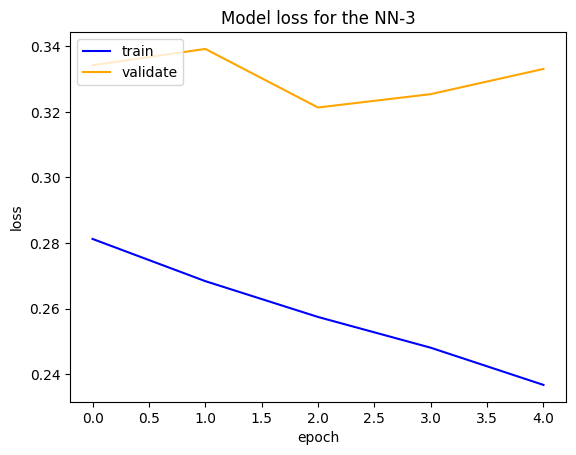

In [15]:
#Plot loss results for training data and testing data 
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

### Experimenting with the Model

As part of this workshop, we encourage you to not just understand the model but to dive in and tweak it. Experimentation is key to learning and potentially improving the model's accuracy and efficiency. Here are some aspects you can adjust:

- **Number of Layers and Neurons:**
  - Try adding more layers or changing the number of neurons in existing layers. More layers/neurons can increase model complexity and potentially accuracy, but watch out for overfitting.

- **Activation Functions:**
  - Experiment with different activation functions like `sigmoid`, `tanh`, or advanced ones like `LeakyReLU` to see how they affect model performance.

- **Optimizer:**
  - While `adam` is a solid choice, exploring others like `SGD`, `RMSprop`, or `Adagrad` might yield interesting results. Each optimizer has its strategy for minimizing loss.

- **Learning Rate:**
  - Adjusting the learning rate can significantly impact your model's training speed and convergence. Try different values to find an optimal setting.

- **Batch Size:**
  - Changing the batch size affects how many examples the model sees before updating weights. A larger batch may improve training stability.

- **Regularization Techniques:**
  - Implement techniques like dropout or L2 regularization to prevent overfitting, especially if you're increasing the model's complexity.

- **Data Augmentation:**
  - Augmenting your data with transformations like rotation, scaling, or flipping can make your model more robust and less prone to overfitting.

- **Loss Functions:**
  - For different kinds of problems, or to focus on different aspects of training, try experimenting with other loss functions.

Remember, the goal of these experiments is not just to boost performance but to gain insights into how each change impacts the model's learning process. Feel free to mix and match these suggestions and observe the results. Happy tweaking!


In [ ]:
# This is where you can start to make your tweaks
# Feel free to add more cells and take this project wherever you want
